**Step 1: Load and Clean the Data**

1-Import Libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: Setting the style for plots
sns.set(style="whitegrid")


2-Load the Dataset:

In [2]:
from google.colab import files

# Upload the dataset
uploaded = files.upload()

# Assuming the file is named "WALMART_SALES_DATA.csv"
df = pd.read_csv('/content/WALMART_SALES_DATA.csv')

Saving WALMART_SALES_DATA.csv to WALMART_SALES_DATA (1).csv


3-Convert Date Column to Datetime:

In [3]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')


4-Check for Missing Values:

In [4]:
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)


Missing values in each column:
 Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64


5-Basic Data Exploration:

In [5]:
# Display the first few rows
print(df.head())

# Summary statistics
print(df.describe())


   Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1 2010-02-05    1643690.90             0        42.31       2.572   
1      1 2010-02-12    1641957.44             1        38.51       2.548   
2      1 2010-02-19    1611968.17             0        39.93       2.514   
3      1 2010-02-26    1409727.59             0        46.63       2.561   
4      1 2010-03-05    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106  
             Store                 Date  Weekly_Sales  Holiday_Flag  \
count  6435.000000                 6435  6.435000e+03   6435.000000   
mean     23.000000  2011-06-17 00:00:00  1.046965e+06      0.069930   
min       1.000000  2010-02-05 00:00:00  2.099862e+05      0.000000   
25%      12.000000  2010-10-08 00:00:00  5.533501e+05      0.000000   
50%     

**Step 2: Descriptive Statistics**

1-Maximum Sales by Store:

In [6]:
store_sales = df.groupby('Store')['Weekly_Sales'].sum()
max_sales_store = store_sales.idxmax()
print(f"Store with maximum sales: {max_sales_store}, Total Sales: {store_sales[max_sales_store]}")


Store with maximum sales: 20, Total Sales: 301397792.46


2-Sales Variability:

In [7]:
store_sales_std = df.groupby('Store')['Weekly_Sales'].std()
max_std_store = store_sales_std.idxmax()
print(f"Store with highest sales variability: {max_std_store}, Standard Deviation: {store_sales_std[max_std_store]}")


Store with highest sales variability: 14, Standard Deviation: 317569.9494755081


3-Coefficient of Variation:

In [8]:
store_sales_stats = df.groupby('Store')['Weekly_Sales'].agg(['mean', 'std'])
store_sales_stats['coef_variation'] = store_sales_stats['std'] / store_sales_stats['mean']
print(store_sales_stats.sort_values('coef_variation', ascending=False).head())


               mean            std  coef_variation
Store                                             
35     9.197250e+05  211243.457791        0.229681
7      5.706173e+05  112585.469220        0.197305
15     6.233125e+05  120538.652043        0.193384
29     5.394514e+05   99120.136596        0.183742
23     1.389864e+06  249788.038068        0.179721


**Step 3: Time Series Analysis**

1-Sales Trends Over Time:

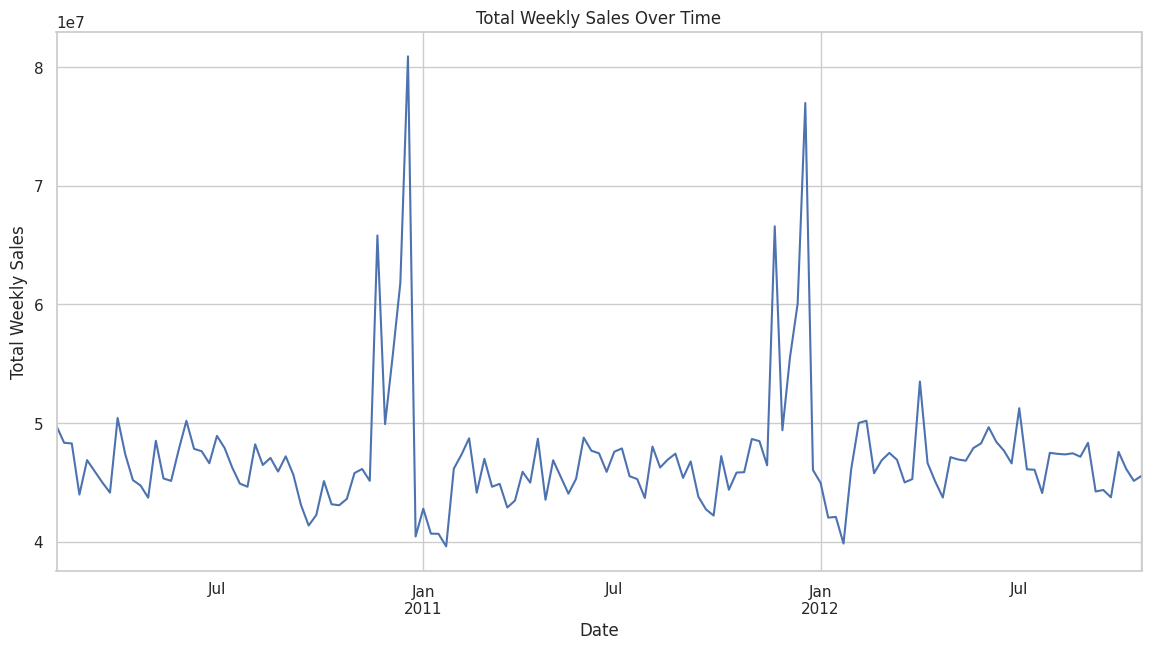

In [9]:
# Set the date as the index
df.set_index('Date', inplace=True)

# Plot total sales over time
plt.figure(figsize=(14, 7))
df.groupby('Date')['Weekly_Sales'].sum().plot()
plt.title('Total Weekly Sales Over Time')
plt.ylabel('Total Weekly Sales')
plt.xlabel('Date')
plt.show()


2-Quarterly Growth Analysis:

In [10]:
df['Quarter'] = df.index.to_period('Q')
quarterly_sales = df.groupby('Quarter')['Weekly_Sales'].sum()

# Calculate quarter-over-quarter growth
quarterly_growth = quarterly_sales.pct_change()
print("Quarterly Growth Rate:\n", quarterly_growth)


Quarterly Growth Rate:
 Quarter
2010Q1         NaN
2010Q2    0.639664
2010Q3   -0.021104
2010Q4    0.186259
2011Q1   -0.253090
2011Q2    0.129500
2011Q3    0.069254
2011Q4    0.065915
2012Q1   -0.130644
2012Q2    0.043597
2012Q3   -0.021498
2012Q4   -0.695273
Freq: Q-DEC, Name: Weekly_Sales, dtype: float64


3-Monthly and Semester Sales:

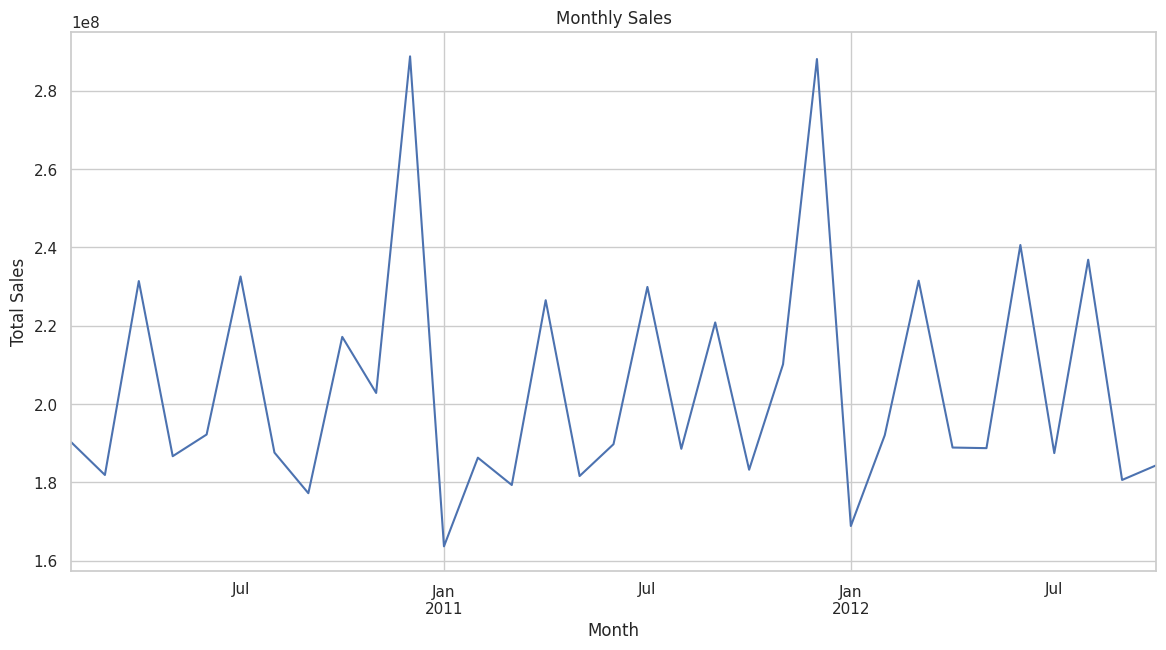

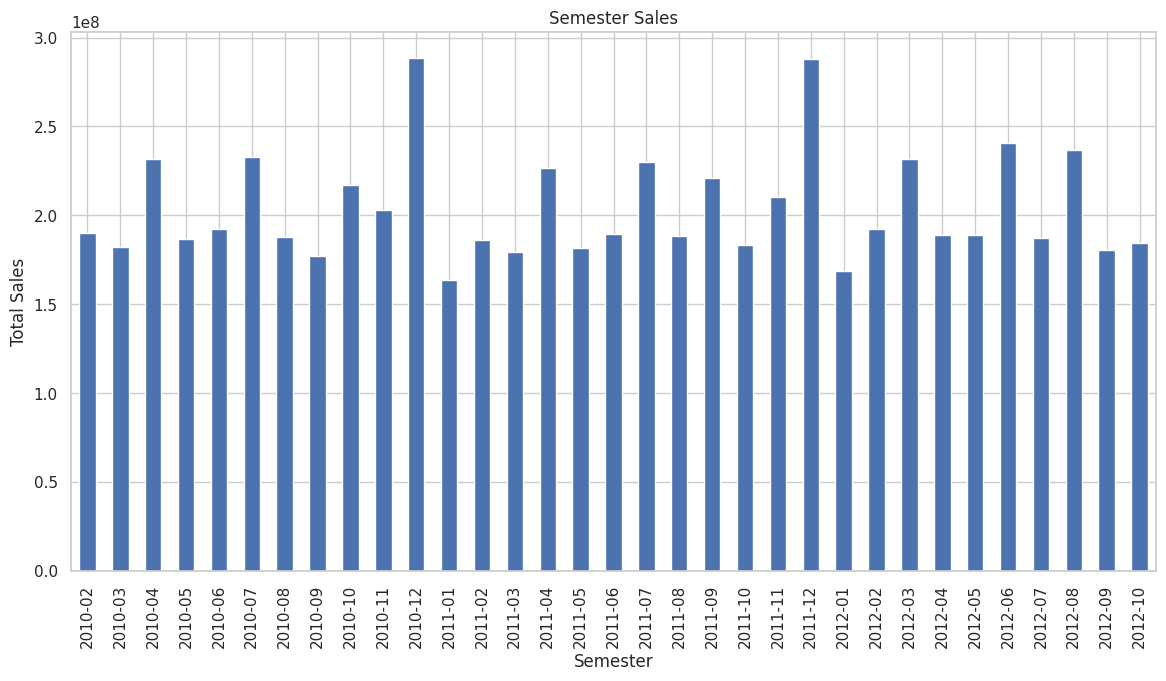

In [11]:
# Monthly Sales
plt.figure(figsize=(14, 7))
df.groupby(df.index.to_period('M'))['Weekly_Sales'].sum().plot()
plt.title('Monthly Sales')
plt.ylabel('Total Sales')
plt.xlabel('Month')
plt.show()

# Semester Sales
df['Semester'] = df.index.to_period('6M')
semester_sales = df.groupby('Semester')['Weekly_Sales'].sum()

plt.figure(figsize=(14, 7))
semester_sales.plot(kind='bar')
plt.title('Semester Sales')
plt.ylabel('Total Sales')
plt.xlabel('Semester')
plt.show()


**Step 4: Holiday Impact Analysis**



1-Compare Holiday and Non-Holiday Sales:

In [12]:
avg_sales_holiday = df.groupby('Holiday_Flag')['Weekly_Sales'].mean()
print(f"Average sales on holiday weeks: {avg_sales_holiday[1]}")
print(f"Average sales on non-holiday weeks: {avg_sales_holiday[0]}")


Average sales on holiday weeks: 1122887.8923555557
Average sales on non-holiday weeks: 1041256.3802088555


2-Identify Holidays with Higher Sales:

In [14]:
# Holidays with higher sales than the average of non-holiday sales
print("Holidays with higher sales than the average of non-holiday sales:\n",
      higher_sales_holidays[['Store', 'Weekly_Sales']].reset_index()) # Reset the index to access 'Date' as a column

Holidays with higher sales than the average of non-holiday sales:
           Date  Store  Weekly_Sales
0   2010-02-12      1    1641957.44
1   2010-09-10      1    1507460.69
2   2010-11-26      1    1955624.11
3   2010-12-31      1    1367320.01
4   2011-02-11      1    1649614.93
..         ...    ...           ...
215 2011-12-30     41    1264014.16
216 2012-02-10     41    1238844.56
217 2012-09-07     41    1392143.82
218 2010-11-26     45    1182500.16
219 2011-11-25     45    1170672.94

[220 rows x 3 columns]


**Step 5: Predictive Modeling**

1-Prepare the Data:

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# Create a numerical 'Day' feature from the 'Date'
df.reset_index(inplace=True)
df['Day'] = (df['Date'] - df['Date'].min()).dt.days

# Select features and target variable
features = ['Day', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
X = df[features]
y = df['Weekly_Sales']


2-Split the Data:

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


3-Build and Train the Model:

In [17]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

4-Evaluate the Model:

Mean Absolute Error: 471494.1379776928
R^2 Score: 0.018691760899986476


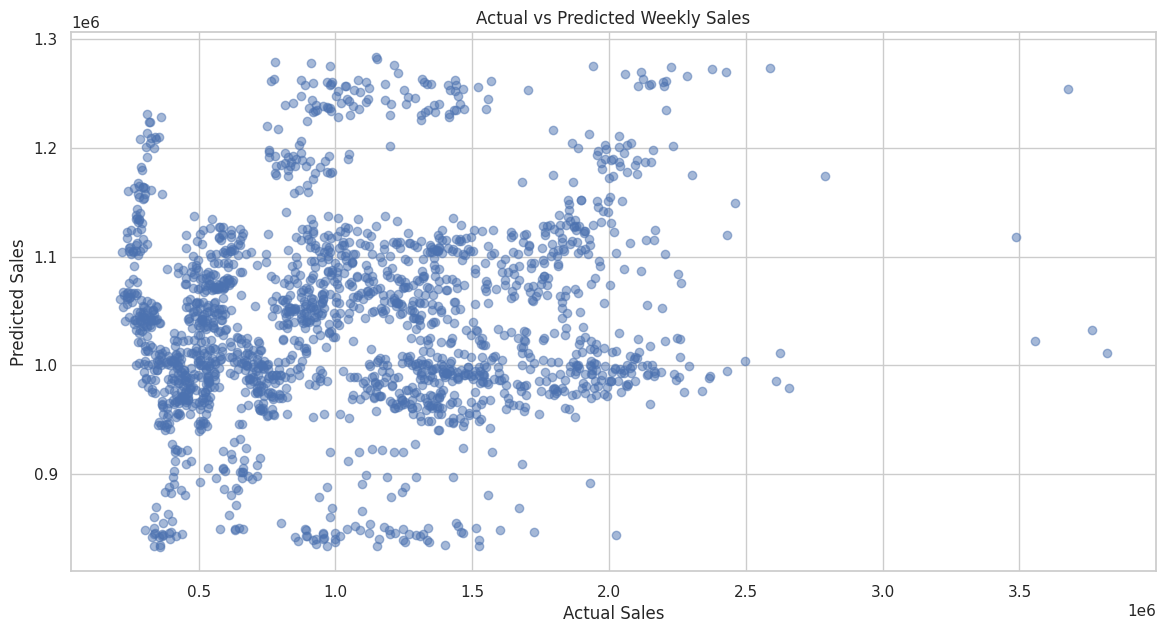

In [18]:
y_pred = model.predict(X_test)
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}")
print(f"R^2 Score: {r2_score(y_test, y_pred)}")

# Plot actual vs predicted
plt.figure(figsize=(14, 7))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Actual vs Predicted Weekly Sales')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.show()


**Step 6: Visualization**

1-Plotting Total Weekly Sales Over Time

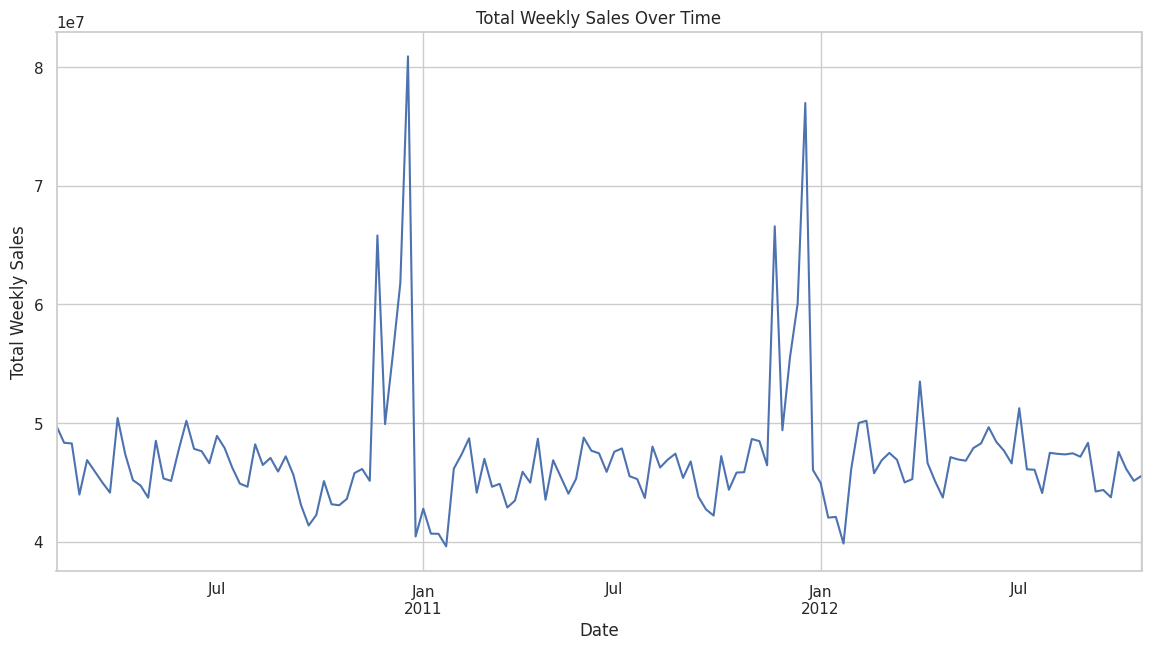

In [20]:
# Plot total weekly sales over time
plt.figure(figsize=(14, 7))
df.groupby('Date')['Weekly_Sales'].sum().plot()
plt.title('Total Weekly Sales Over Time')
plt.ylabel('Total Weekly Sales')
plt.xlabel('Date')
plt.show()



2-Plotting Quarterly Sales Growth

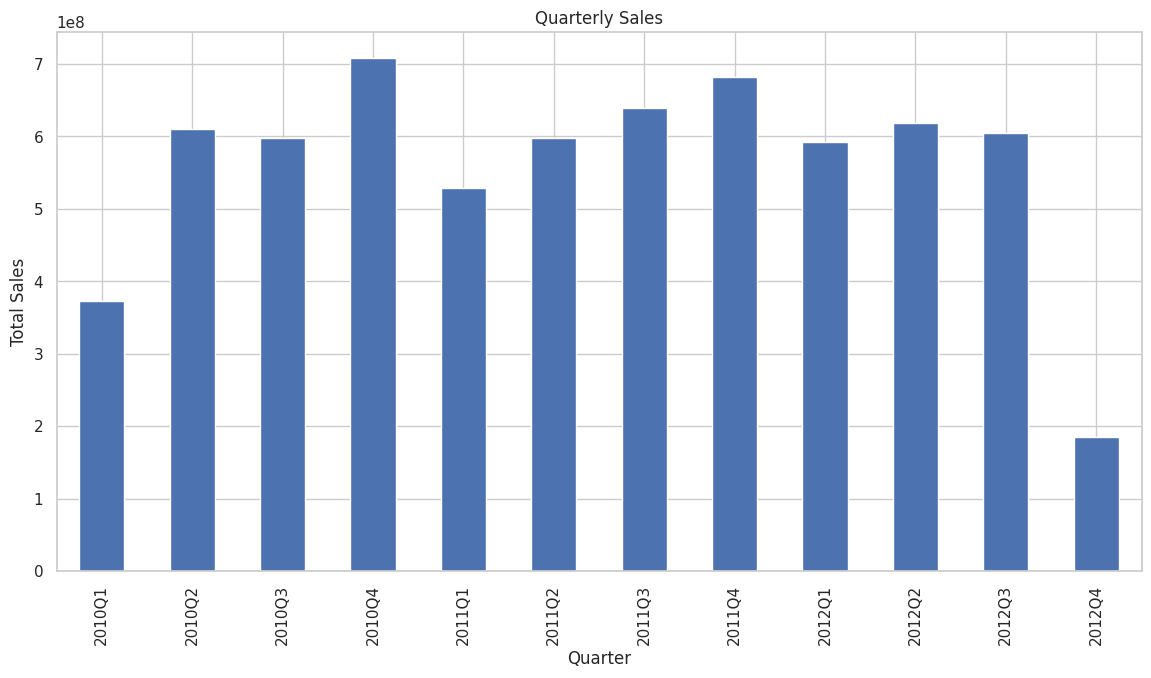

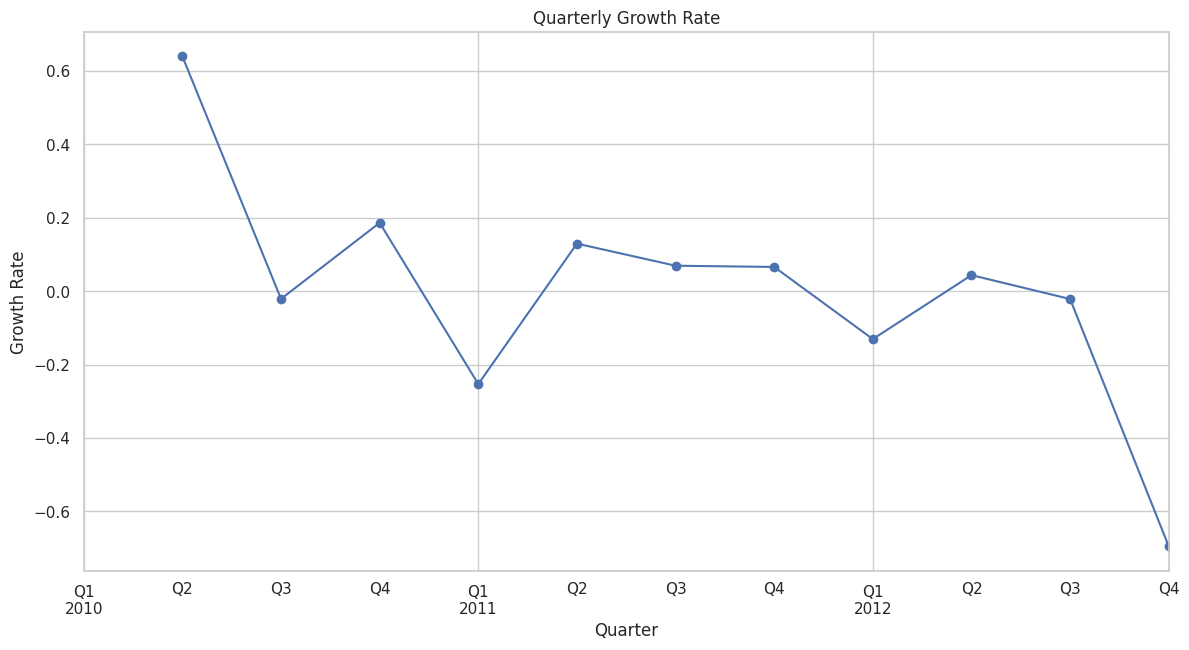

In [21]:
# Plot quarterly sales
plt.figure(figsize=(14, 7))
quarterly_sales.plot(kind='bar')
plt.title('Quarterly Sales')
plt.ylabel('Total Sales')
plt.xlabel('Quarter')
plt.show()

# Plot quarterly growth rate
plt.figure(figsize=(14, 7))
quarterly_growth.plot(kind='line', marker='o')
plt.title('Quarterly Growth Rate')
plt.ylabel('Growth Rate')
plt.xlabel('Quarter')
plt.show()


3-Plotting Monthly and Semester Sales

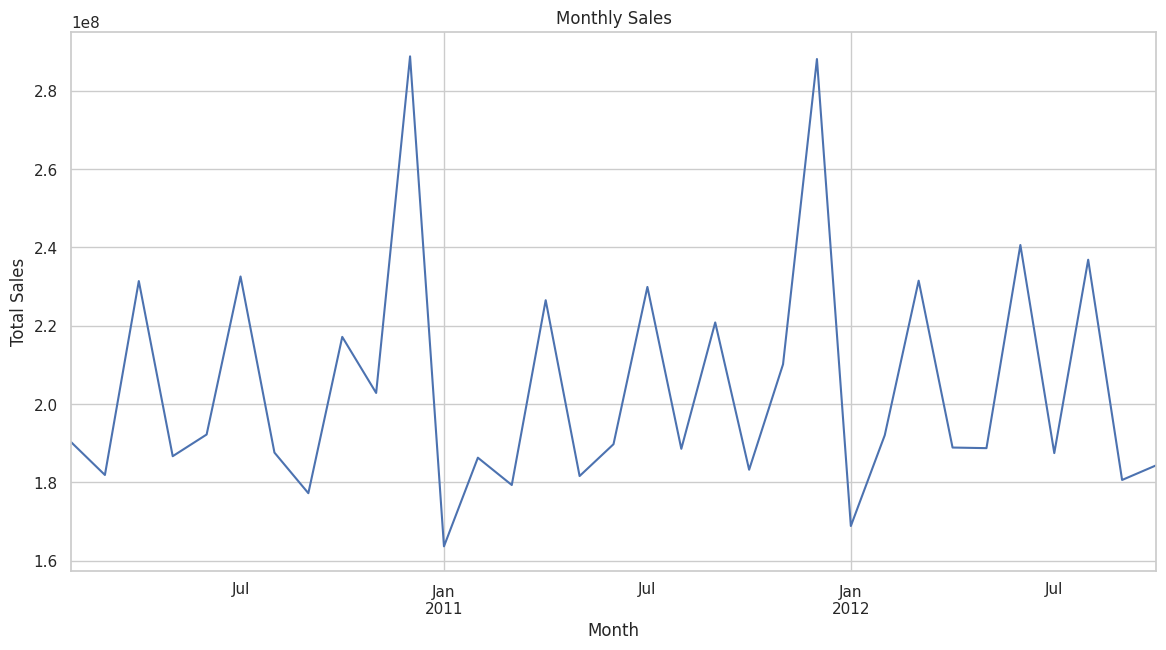

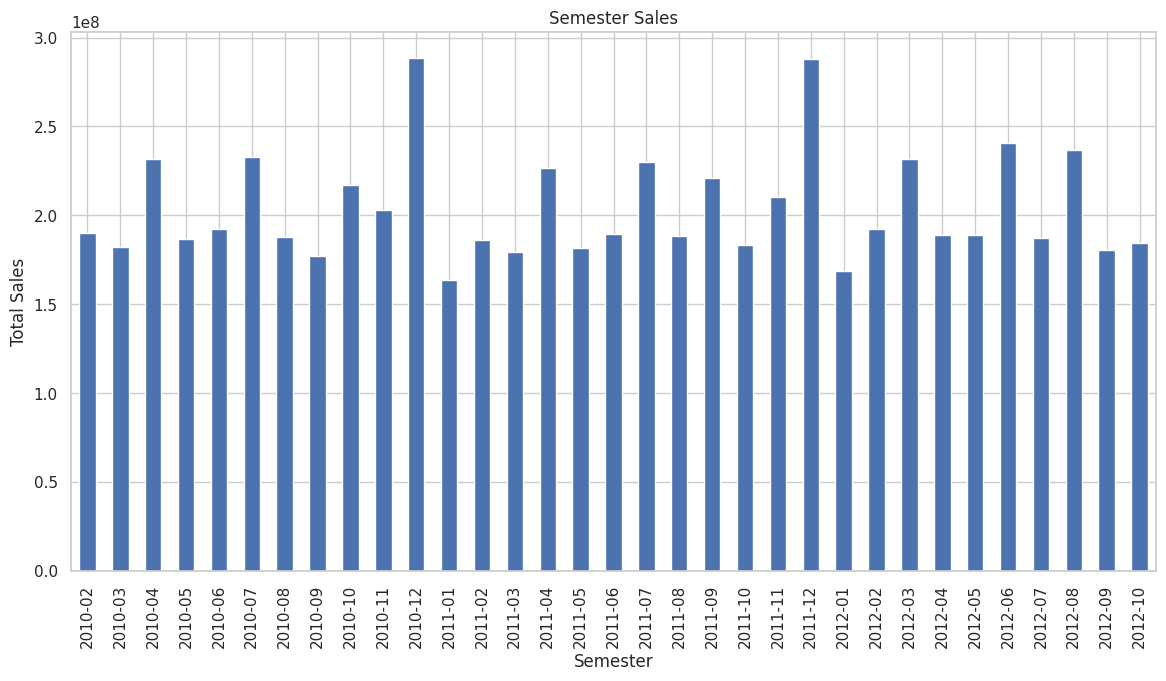

In [25]:
# Monthly Sales Plot
plt.figure(figsize=(14, 7))
df.groupby(df['Date'].dt.to_period('M'))['Weekly_Sales'].sum().plot()
plt.title('Monthly Sales')
plt.ylabel('Total Sales')
plt.xlabel('Month')
plt.show()

# Semester Sales Plot
plt.figure(figsize=(14, 7))
semester_sales.plot(kind='bar')
plt.title('Semester Sales')
plt.ylabel('Total Sales')
plt.xlabel('Semester')
plt.show()


4-Plotting Holiday vs Non-Holiday Sales

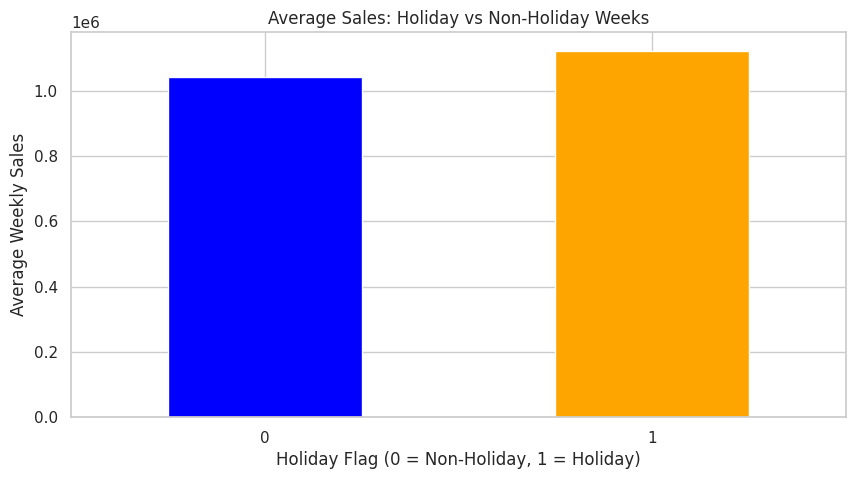

In [26]:
# Plot average sales on holidays vs non-holidays
plt.figure(figsize=(10, 5))
avg_sales_holiday.plot(kind='bar', color=['blue', 'orange'])
plt.title('Average Sales: Holiday vs Non-Holiday Weeks')
plt.ylabel('Average Weekly Sales')
plt.xlabel('Holiday Flag (0 = Non-Holiday, 1 = Holiday)')
plt.xticks(rotation=0)
plt.show()


5-Plotting Actual vs Predicted Sales (Model Evaluation)

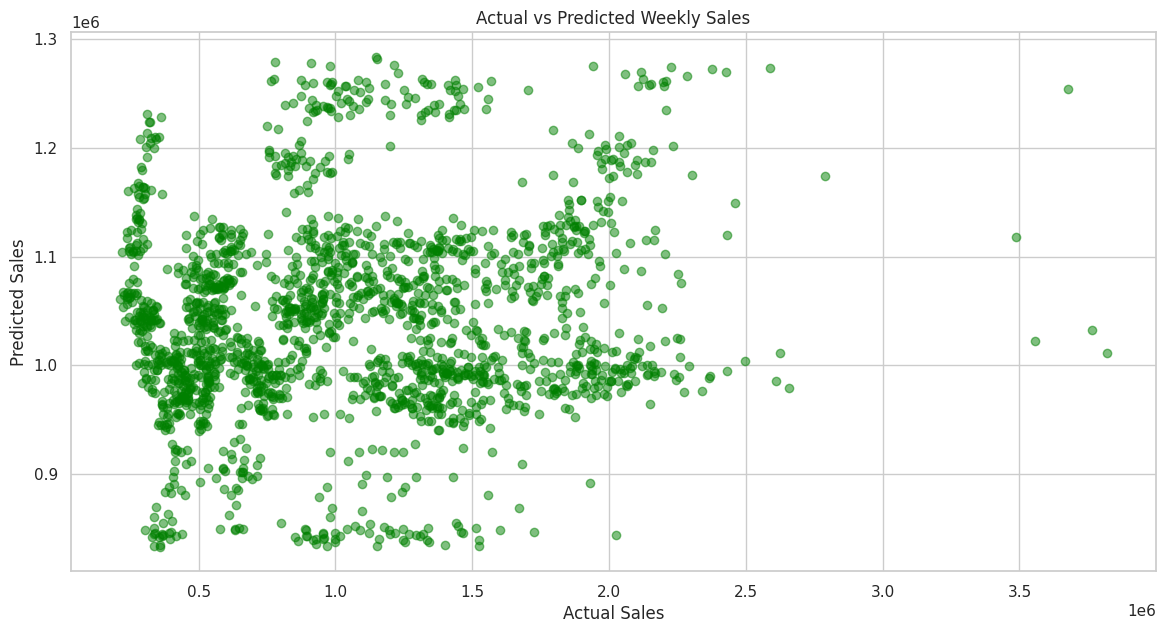

In [27]:
# Scatter plot of actual vs predicted sales
plt.figure(figsize=(14, 7))
plt.scatter(y_test, y_pred, alpha=0.5, color='green')
plt.title('Actual vs Predicted Weekly Sales')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.show()
